<font size=7> Latencies Analysis

In [1]:
import pickle
from human_hip.spike_data import curate_latencies, plot_raster_latency_pairs, plot_vector_layout, read_phy_files,\
                                  plot_latency_dist_hist, plot_latency_angle_hist, latency_times
from human_hip.animate import animate_latencies
from ipywidgets import interact_manual, interact
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
with open("/workspaces/human_hippocampus/data/ephys/2023-04-02-e-hc328_unperturbed/sd_ca1_curated.pkl", "rb") as filename:
    sd = pickle.load(filename)

In [3]:
import numpy as np
from human_hip.spike_data import latencies, cross_sttc

In [ ]:
# import numpy as np
# from human_hip.spike_data import latencies, cross_sttc

# def curate_latencies(sd,  cross_sttc_max_cutoff=30, sttc_cutoff = 0.04, latency_cutoff=2.5, sttc_delta=20 ):

#     # Get all latencies whose STTC is above some minimum STTC cuttoff
#     print(sd.N**2 , "Starting Pairs")
#     sttc_neo = sd.spike_time_tilings( sttc_delta )    # sttc matrix   
#     pairs = []                            # get list (without duplicates) of all pairs above cutoff (excluding diagonal)
#     for i in range(sd.N):
#         for j in range(i+1,sd.N):
#             if sttc_neo[i,j] > sttc_cutoff:
#                 pairs.append([i,j])
#     print( len(pairs), "pairs above sttc cutoff")

#     # Get all latencies whose median latency is above some minimum Latency Cuttoff
#     pairs_late = [] #lags_late = []
#     for pair in pairs:
#         pair_latencies = latencies( pair[0], pair[1], sd, ms_cutoff_high=cross_sttc_max_cutoff)  #latency= np.median(pair_latencies)
#         if abs(np.mean(pair_latencies))> latency_cutoff and len(pair_latencies)>25:
#         #if stats.ttest_1samp(pair_latencies,0)[1]<.1 and len(pair_latencies)>25:
#             #pairs_late.append( pair )  #lags_late.append( latency )
#             if np.mean(pair_latencies) < 0:
#                 pair_latencies = latencies( pair[1], pair[0], sd, ms_cutoff_high=cross_sttc_max_cutoff) 
#                 if np.mean(pair_latencies)> latency_cutoff and len(pair_latencies)>25:
#                     #print("original pair: ", pair)
#                     #print("added pair: ", [ pair[1], pair[0] ])
#                     pairs_late.append( [ pair[1], pair[0] ] )   #lags_late.append( latency )
#             else:
#                 pairs_late.append( pair ) 
#     print( len(pairs_late), "pairs above latencency cutoff")


#     ##Do t_test
#     print("Starting t_test")
#     pairs_final = []
#     for pair in pairs_late: 
#         pair_latencies = latencies( pair[0], pair[1], sd, ms_cutoff_high=cross_sttc_max_cutoff)
#         t_stat, p_value = stats.ttest_1samp( pair_latencies, 0)
#         one_sided_p_value = p_value / 2 if t_stat > 0 else 1 - p_value / 2
#         if one_sided_p_value < .1:
#             pairs_final.append( pair )
#     print( len(pairs_final), "pairs above t_test")
    
#     mean_latencies = []
#     for pair in pairs_final:
#         mean_latency = np.mean( latencies( pair[0], pair[1], sd, ms_cutoff_high=cross_sttc_max_cutoff)  )
#         mean_latencies.append(mean_latency)
#     print("all final pairs positive?:", np.all( np.array(mean_latencies)>0 ))
#     #good_pairs =   np.array(pairs_final)

#     return  pairs_final


In [4]:
import numpy as np
from human_hip.spike_data import latencies, cross_sttc

def curate_latencies(sd,  latency_ms=20, sttc_cutoff = 0.04, latency_cutoff=1.5, sttc_delta=20, pval=.1 ):

    # Get all latencies whose STTC is above some minimum STTC cuttoff
    print(sd.N**2 , "Starting Pairs")
    sttc_neo = sd.spike_time_tilings( sttc_delta )    # sttc matrix   
    pairs = []                            # get list (without duplicates) of all pairs above cutoff (excluding diagonal)
    for i in range(sd.N):
        for j in range(i+1,sd.N):
            if sttc_neo[i,j] > sttc_cutoff:
                pairs.append([i,j])
    print( len(pairs), "pairs above sttc cutoff")

    # Get all latencies whose median latency is above some minimum Latency Cuttoff
    pairs_late = [] #lags_late = []
    for pair in pairs:
        pair_latencies = latencies( pair[0], pair[1], sd, ms_cutoff_high=latency_ms)  #latency= np.median(pair_latencies)
        if abs(np.mean(pair_latencies))> latency_cutoff and len(pair_latencies)>25:
        #if stats.ttest_1samp(pair_latencies,0)[1]<.1 and len(pair_latencies)>25:
            #pairs_late.append( pair )  #lags_late.append( latency )
            if np.mean(pair_latencies) < 0:
                pair_latencies = latencies( pair[1], pair[0], sd, ms_cutoff_high=latency_ms) 
                if np.mean(pair_latencies)> latency_cutoff and len(pair_latencies)>25:
                    #print("original pair: ", pair)
                    #print("added pair: ", [ pair[1], pair[0] ])
                    pairs_late.append( [ pair[1], pair[0] ] )   #lags_late.append( latency )
            else:
                pairs_late.append( pair ) 
    print( len(pairs_late), "pairs above latencency cutoff")


    ##Do t_test
    print("Starting t_test")
    pairs_final = []
    for pair in pairs_late: 
        pair_latencies = latencies( pair[0], pair[1], sd, ms_cutoff_high=latency_ms)
        t_stat, p_value = stats.ttest_1samp( pair_latencies, 0)
        one_sided_p_value = p_value / 2 if t_stat > 0 else 1 - p_value / 2
        if one_sided_p_value < pval:
            pairs_final.append( pair )
    print( len(pairs_final), "pairs above t_test")
    
    mean_latencies = []
    for pair in pairs_final:
        mean_latency = np.mean( latencies( pair[0], pair[1], sd, ms_cutoff_high=latency_ms)  )
        mean_latencies.append(mean_latency)
    print("all final pairs positive?:", np.all( np.array(mean_latencies)>0 ))
    #good_pairs =   np.array(pairs_final)

    return  pairs_final



In [5]:
#latency_ms = 15
#good_pairs = curate_latencies(sd,  latency_ms=latency_ms, sttc_cutoff = 0.02, latency_cutoff=1, sttc_delta=20, pval=.05 ) 
latency_ms = 20
good_pairs = curate_latencies(sd,  latency_ms=latency_ms, sttc_cutoff = 0.02, latency_cutoff=1.3, sttc_delta=20, pval=.05 ) 
good_pairs2 = np.array(good_pairs)

# with open( 'hc328_good_pairs.pkl' , 'wb') as my_file:
#    pickle.dump(good_pairs, my_file)
# load pickled data
# with open( 'hc328_good_pairs.pkl' , 'rb') as my_file:
#     good_pairs = pickle.load(my_file)

18496 Starting Pairs
1861 pairs above sttc cutoff
392 pairs above latencency cutoff
Starting t_test
138 pairs above t_test
all final pairs positive?: True


In [22]:
#good_pairs
len(good_pairs)

mean_latencies = []
for pair in good_pairs:
    mean_latency = np.mean( latencies( pair[0], pair[1], sd, ms_cutoff_high=latency_ms)  )
    mean_latencies.append(mean_latency)
print("all final pairs positive?:", np.all( np.array(mean_latencies)>0 ))

all final pairs positive?: True


/tmp/ipykernel_102997/1792022421.py:26: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():


all final pairs positive?: True


/tmp/ipykernel_102997/1792022421.py:59: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('hsv')


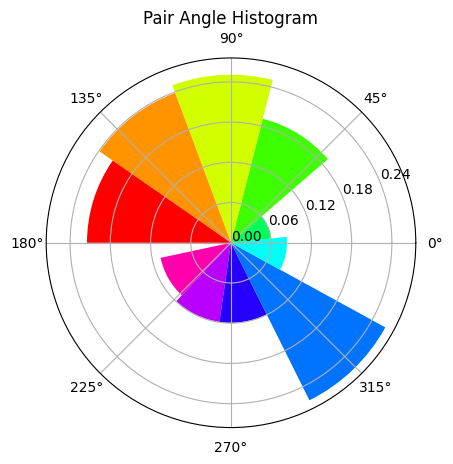

In [23]:
plot_latency_angle_hist(sd, good_pairs, late_cutoff_high=latency_ms)

all final pairs positive?: True


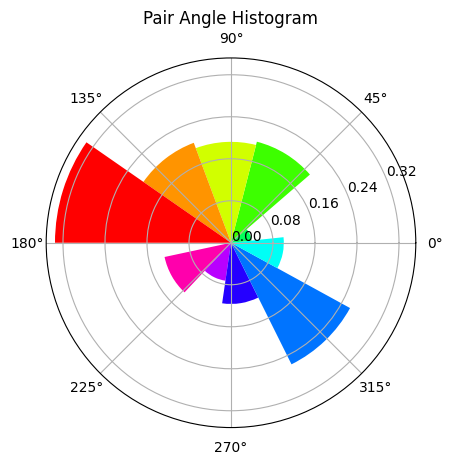

In [8]:
plot_latency_angle_hist(sd, good_pairs, by_firing_rate=True, late_cutoff_low=0, late_cutoff_high=latency_ms)

# Vector plots

In [12]:
plot_vector_layout

<function human_hip.spike_data.plot_latencies.plot_vector_layout(sd, pairs, normalize=True, plot_neuron=True, arrow_length=75, min_dist=0, image_path=None, xlim=None, ylim=None, background_color='white')>

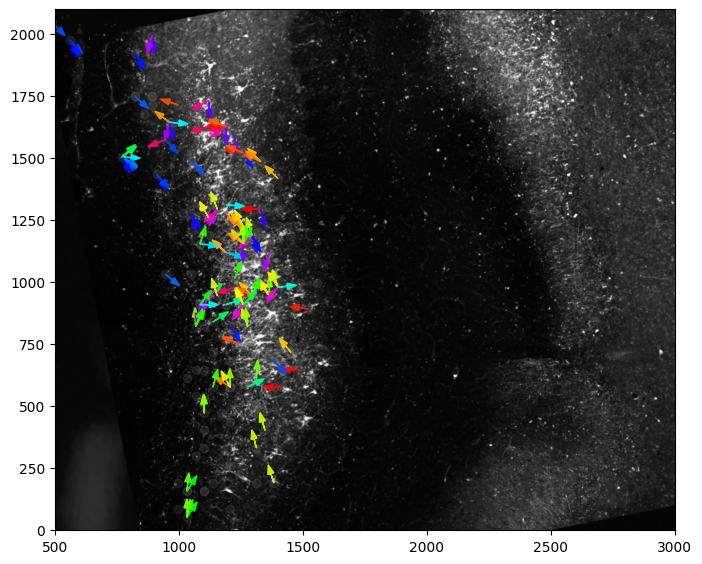

In [7]:
plot_vector_layout( sd, good_pairs2, image_path="/workspaces/human_hippocampus/data/histology/hc328_bw.jpeg", xlim=(500,3000) )

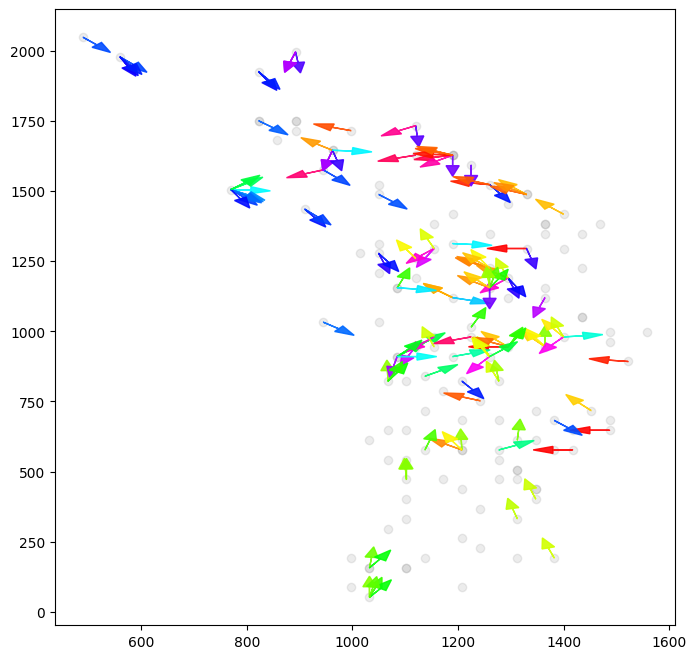

In [23]:
plot_vector_layout( sd, good_pairs2)

In [26]:
from ipywidgets import interact_manual, interact
from scipy import stats

def pairs_hisogram(good_pairs, sd, ms_cutoff_high=latency_ms ):
    @interact
    def plot_pair(pair_i = (0, len(good_pairs)-1) ):
        latencies_pair = latencies( good_pairs[pair_i][0], good_pairs[pair_i][1], sd, ms_cutoff_high=ms_cutoff_high )
        plt.xlim(-ms_cutoff_high, ms_cutoff_high)
        plt.hist(latencies_pair, bins=12)
        print("Pair: ", good_pairs[pair_i][0],good_pairs[pair_i][1] )
        print("Latency Mean:\t", np.mean(latencies_pair ) )

        t_stat, p_value = stats.ttest_1samp( latencies_pair, 0)
        one_sided_p_value = p_value / 2 if t_stat > 0 else 1 - p_value / 2
        print("T-Test 1-Side:\t", one_sided_p_value )  #print("T-Test: ", stats.ttest_1samp(latencies_pair, 0)[1] )
        
pairs_hisogram( good_pairs, sd, ms_cutoff_high=latency_ms)

interactive(children=(IntSlider(value=68, description='pair_i', max=137), Output()), _dom_classes=('widget-int…